In [1]:
import networkx as nx

# Read the edge list file and build the graph
G = nx.DiGraph()
with open("C:\\Users\\YuxinLi\\Downloads\\Network for IC LT.txt", "r") as f:
    next(f)  # Skip the first row (header)
    for line in f:
        parts = line.strip().split()
        if len(parts) < 2:
            continue
        follower = parts[0]
        followee = parts[1]
        # weight = parts[2]  # ignored
        G.add_edge(follower, followee)

# Print the graph
print(G)

DiGraph with 70409 nodes and 1031348 edges


In [2]:
# Find nodes with in-degree > 150
hi_nodes = [n for n, deg in G.in_degree() if deg > 150]

# Extract the subgraph
G_hi = G.subgraph(hi_nodes).copy()

# Print G_hi
print(G_hi)

DiGraph with 256 nodes and 1703 edges


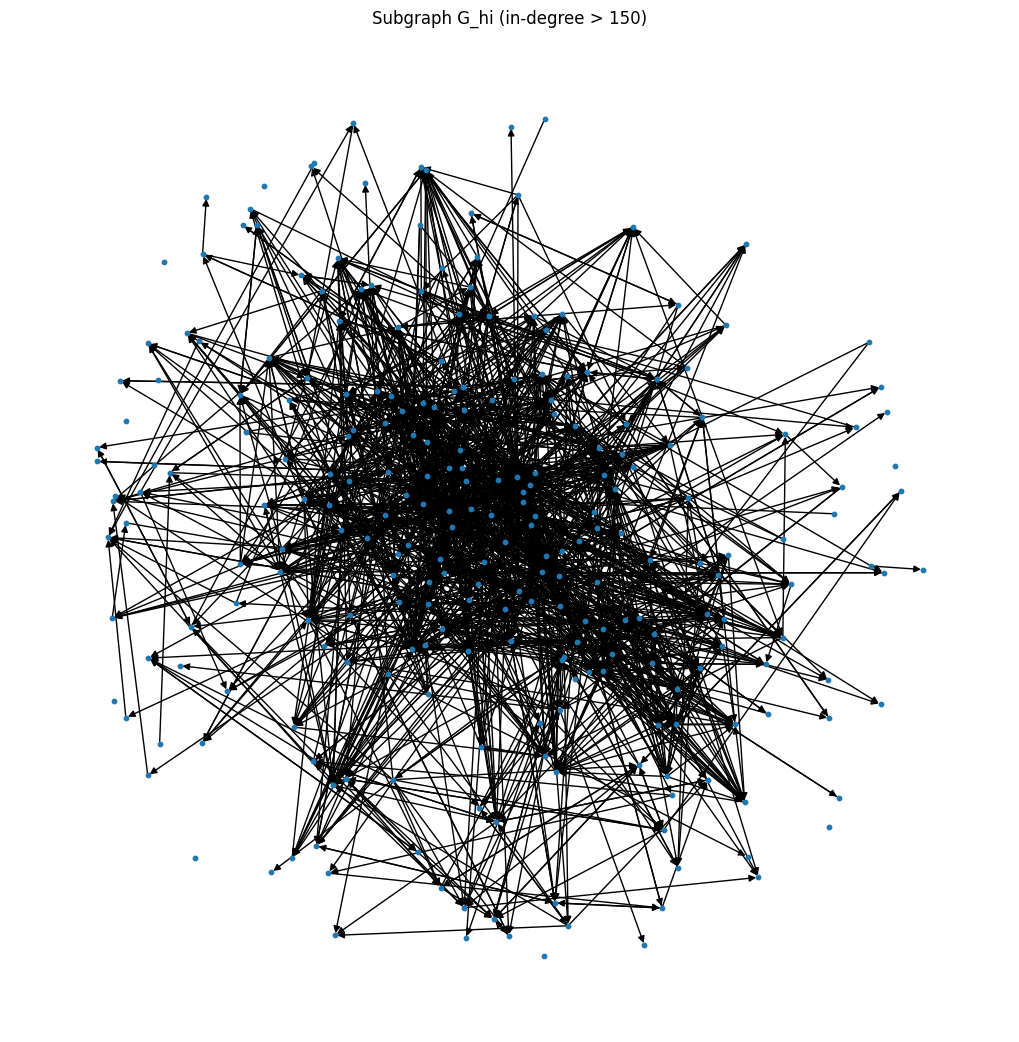

In [3]:
import matplotlib.pyplot as plt

# Visualize using spring layout
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G_hi, k=0.5)
nx.draw(G_hi, pos, node_size=10, with_labels=False)
plt.title("Subgraph G_hi (in-degree > 150)")
plt.show()

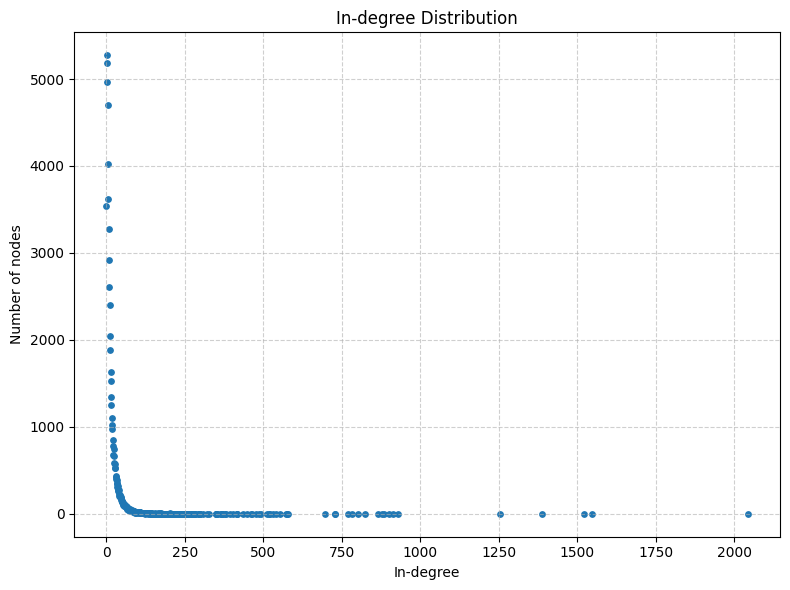

In [4]:
from collections import Counter

# Calculate in-degrees for each node
in_degrees = [d for n, d in G.in_degree()]

# Calculate the in-degree distribution
degree_count = Counter(in_degrees)
degrees, counts = zip(*sorted(degree_count.items()))

# Plot the distribution as a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(degrees, counts, s=15, marker='o')
plt.xlabel('In-degree')
plt.ylabel('Number of nodes')
plt.title('In-degree Distribution')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

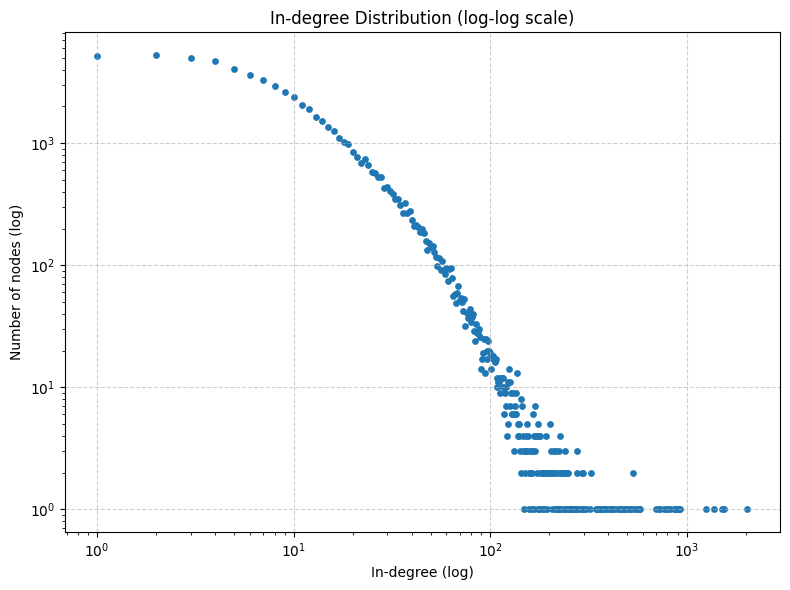

In [5]:
# Plot the distribution on a log-log scale
plt.figure(figsize=(8, 6))
plt.scatter(degrees, counts, s=15, marker='o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('In-degree (log)')
plt.ylabel('Number of nodes (log)')
plt.title('In-degree Distribution (log-log scale)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [6]:
import numpy as np
from scipy.stats import linregress

# Remove points with zero in-degree
degrees = np.array(degrees)
counts = np.array(counts)
mask = degrees > 0
degrees = degrees[mask]
counts = counts[mask]

# Take log of degrees and counts
log_degrees = np.log(degrees)
log_counts = np.log(counts)

# Linear regression
slope, intercept, r_value, p_value, std_err = linregress(log_degrees, log_counts)
power_law_exponent = -slope  # Typically, exponent is -slope in P(k) ~ k^-gamma
power_law_exponent

np.float64(1.9532713343793215)

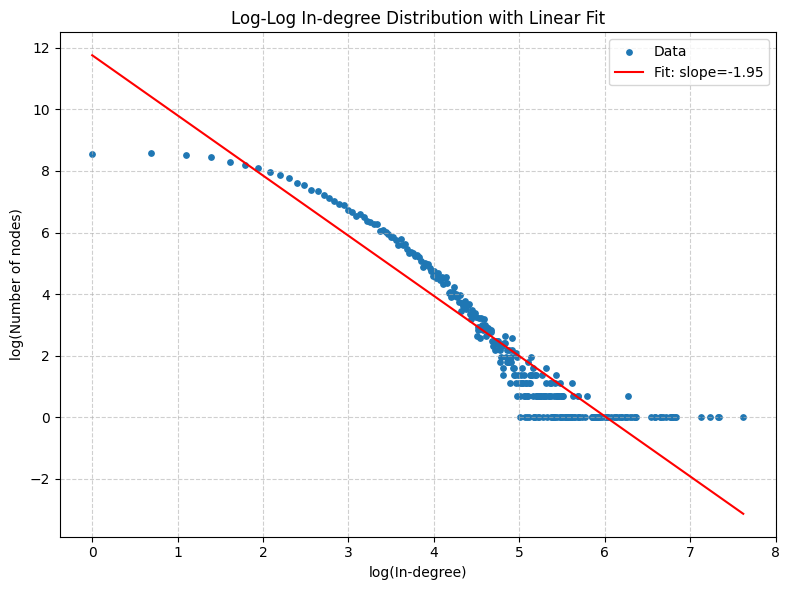

In [7]:
plt.figure(figsize=(8,6))
plt.scatter(log_degrees, log_counts, s=15, marker='o', label='Data')
plt.plot(log_degrees, intercept + slope*log_degrees, 'r', label=f'Fit: slope={slope:.2f}')
plt.xlabel('log(In-degree)')
plt.ylabel('log(Number of nodes)')
plt.title('Log-Log In-degree Distribution with Linear Fit')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [8]:
density = nx.density(G)
print(f"Edge density of the Instagram graph: {density}")

Edge density of the Instagram graph: 0.00020804392877689116


In [9]:
num_nodes = G.number_of_nodes()

avg_in_degree = sum(dict(G.in_degree()).values()) / num_nodes
avg_out_degree = sum(dict(G.out_degree()).values()) / num_nodes

print(f"Average in-degree: {avg_in_degree}")
print(f"Average out-degree: {avg_out_degree}")

Average in-degree: 14.647956937323354
Average out-degree: 14.647956937323354


In [10]:
# Find nodes with in-degree > 50
sub_nodes = [n for n, deg in G.in_degree() if deg > 50]

# Extract the subgraph
G_sub = G.subgraph(sub_nodes).copy()

# Print G_sub
print(G_sub)

DiGraph with 3363 nodes and 61313 edges


In [11]:
# Calculate betweenness centrality using approximation with 100 samples
centrality = nx.betweenness_centrality(G_sub, k=100, seed=42)

# Get top 10 nodes by centrality value
top_10 = sorted(centrality.items(), key=lambda x: x[1], reverse=True)[:10]

print("Top 10 nodes by betweenness centrality:")
for node, value in top_10:
    print(f"{node}: {value:.6f}")

Top 10 nodes by betweenness centrality:
6468: 0.033142
5095: 0.031564
5124: 0.022474
427: 0.021576
4874: 0.021056
69: 0.020650
4077: 0.019170
4397: 0.016337
778: 0.015037
789: 0.013585


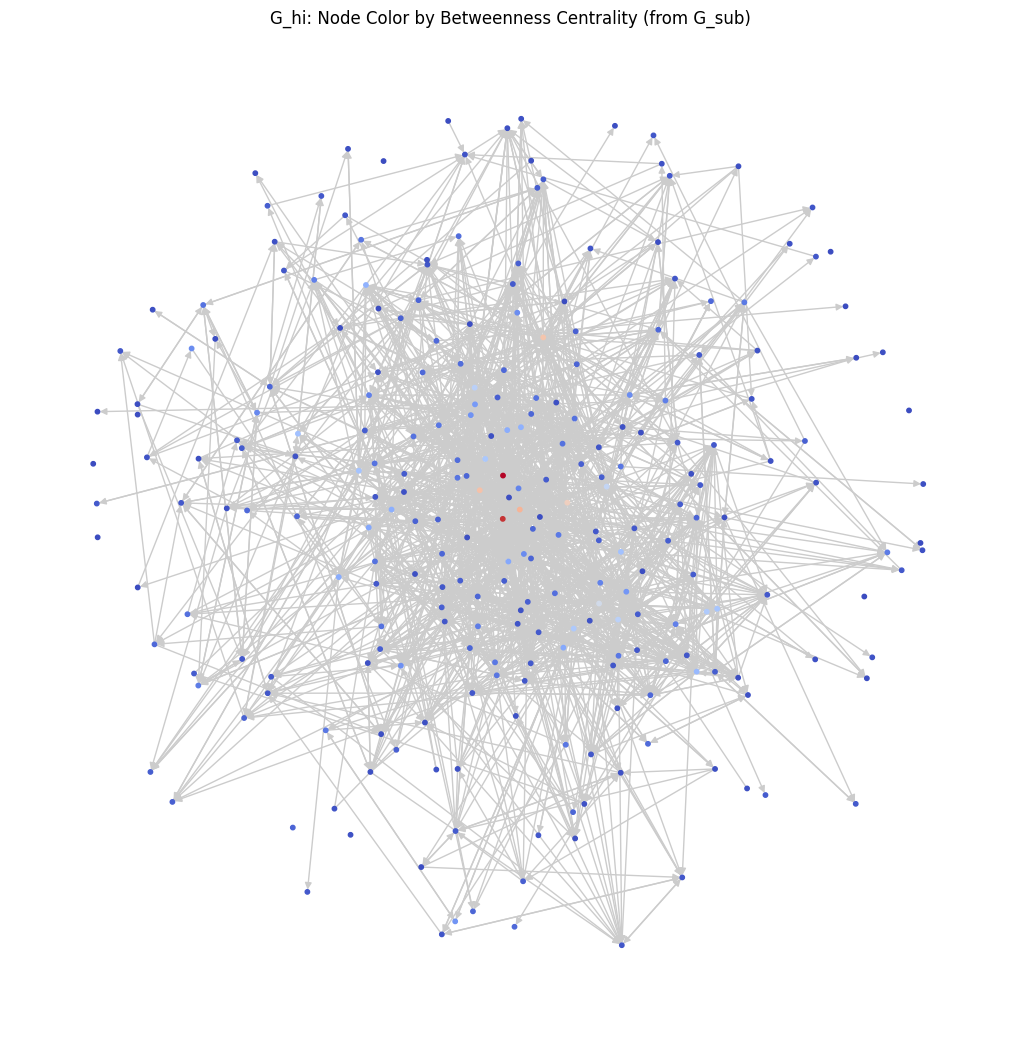

In [12]:
# For each node in G_hi, get its betweenness centrality from G_sub
node_centrality = []
for node in G_hi.nodes():
    # If node is not in G_sub (shouldn't happen), assign centrality 0
    node_centrality.append(centrality.get(node, 0.0))
node_centrality = np.array(node_centrality)

# Normalize centrality for color mapping
norm = plt.Normalize(vmin=node_centrality.min(), vmax=node_centrality.max())
colors = plt.cm.coolwarm(norm(node_centrality))  # red=high, blue=low

# Visualize G_hi with spring layout
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G_hi, k=0.5)
nx.draw(
    G_hi,
    pos,
    node_size=10,
    node_color=colors,
    with_labels=False,
    edge_color="#cccccc",
)
plt.title("G_hi: Node Color by Betweenness Centrality (from G_sub)")
plt.show()

In [13]:
# Calculate closeness centrality
closeness = nx.closeness_centrality(G_sub)

# Get top 10 nodes by closeness centrality
top_10 = sorted(closeness.items(), key=lambda x: x[1], reverse=True)[:10]

print("Top 10 nodes by closeness centrality:")
for node, value in top_10:
    print(f"{node}: {value:.6f}")

Top 10 nodes by closeness centrality:
4874: 0.392316
536: 0.391568
530: 0.387917
790: 0.383615
529: 0.376022
789: 0.375249
224: 0.372738
69: 0.371013
3864: 0.370594
854: 0.368145


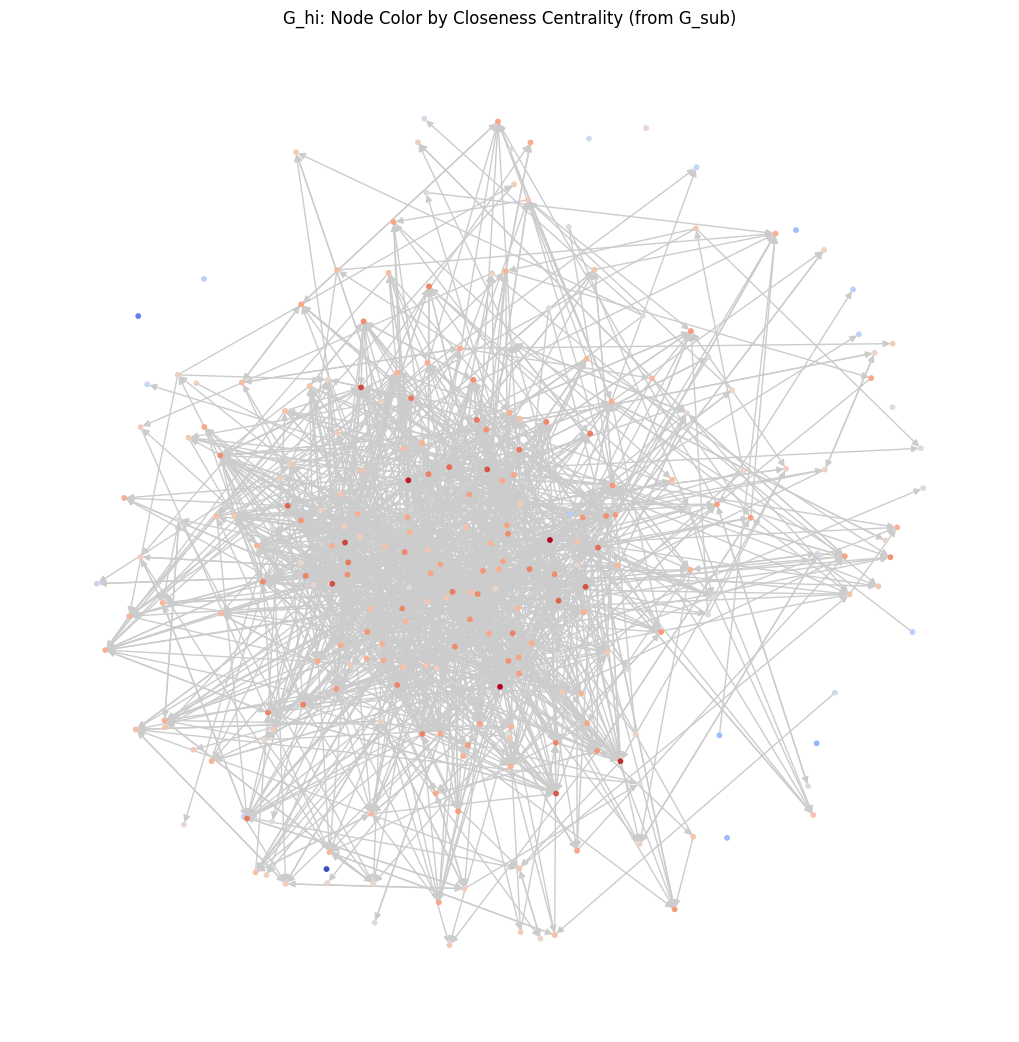

In [14]:
# For each node in G_hi, get its closeness centrality from G_sub
node_closeness = []
for node in G_hi.nodes():
    # If node is not in G_sub (shouldn't happen), assign centrality 0
    node_closeness.append(closeness.get(node, 0.0))
node_closeness = np.array(node_closeness)

# Normalize closeness for color mapping
norm = plt.Normalize(vmin=node_closeness.min(), vmax=node_closeness.max())
colors = plt.cm.coolwarm(norm(node_closeness))  # red=high, blue=low

# Visualize G_hi with spring layout
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G_hi, k=0.5)
nx.draw(
    G_hi,
    pos,
    node_size=10,
    node_color=colors,
    with_labels=False,
    edge_color="#cccccc",
)
plt.title("G_hi: Node Color by Closeness Centrality (from G_sub)")
plt.show()

In [15]:
try:
    eigenvector = nx.eigenvector_centrality(G_sub, max_iter=1000)
except nx.NetworkXException as e:
    print("Eigenvector centrality did not converge:", e)
    exit()

# Get top 10 nodes by eigenvector centrality
top_10 = sorted(eigenvector.items(), key=lambda x: x[1], reverse=True)[:10]

print("Top 10 nodes by eigenvector centrality:")
for node, value in top_10:
    print(f"{node}: {value:.6f}")

Top 10 nodes by eigenvector centrality:
5668: 0.167218
9998: 0.152716
5122: 0.135763
224: 0.133035
6577: 0.127634
9683: 0.127448
1953: 0.126233
10025: 0.123933
8821: 0.123374
9198: 0.115334


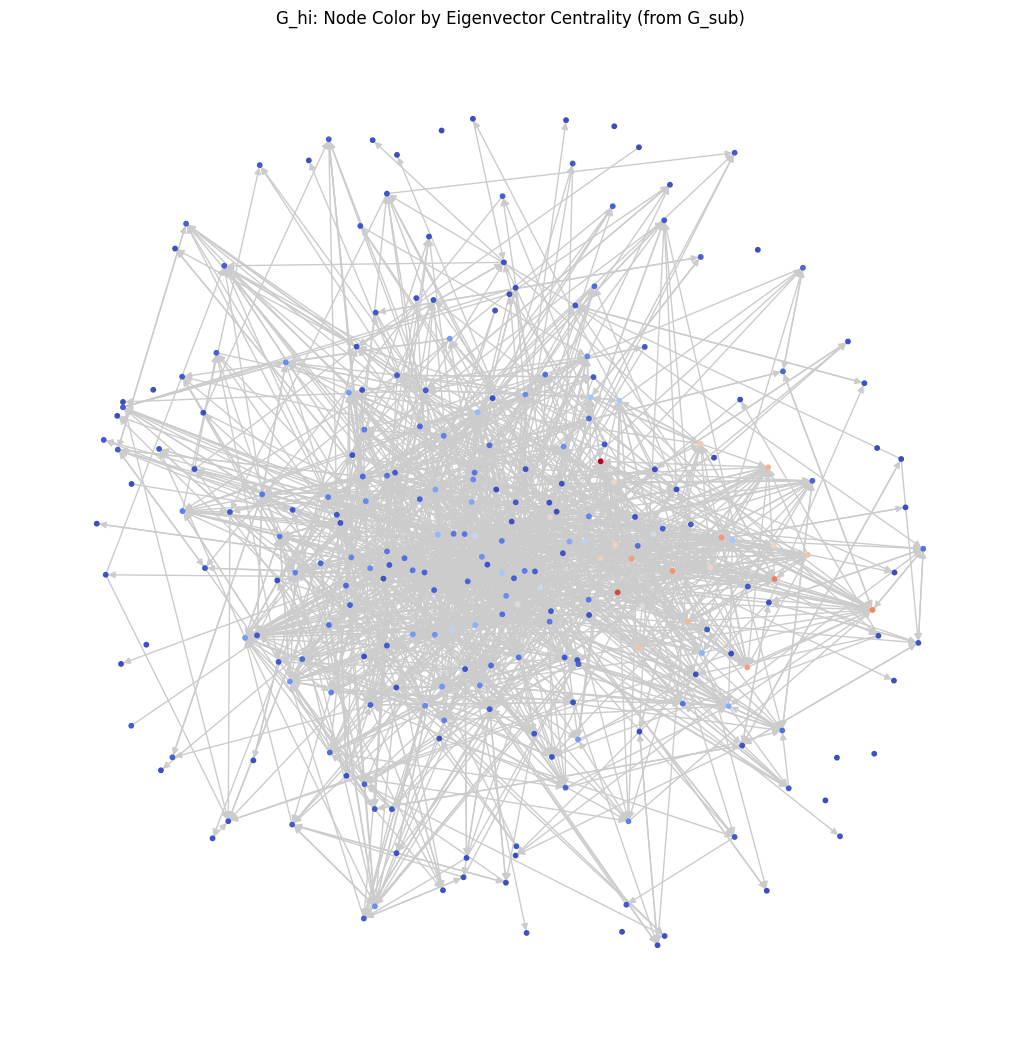

In [16]:
# For each node in G_hi, get its eigenvector centrality from G_sub
node_eigenvector = []
for node in G_hi.nodes():
    # If node is not in G_sub (shouldn't happen), assign centrality 0
    node_eigenvector.append(eigenvector.get(node, 0.0))
node_eigenvector = np.array(node_eigenvector)

# Normalize closeness for color mapping
norm = plt.Normalize(vmin=node_eigenvector.min(), vmax=node_eigenvector.max())
colors = plt.cm.coolwarm(norm(node_eigenvector))  # red=high, blue=low

# Visualize G_hi with spring layout
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G_hi, k=0.5)
nx.draw(
    G_hi,
    pos,
    node_size=10,
    node_color=colors,
    with_labels=False,
    edge_color="#cccccc",
)
plt.title("G_hi: Node Color by Eigenvector Centrality (from G_sub)")
plt.show()

In [17]:
# Convert to undirected
G_sub_ud = G_sub.to_undirected()

# Calculate triangles for each node
triangles_per_node = nx.triangles(G_sub_ud)

# Total number of triangles in the graph
# Each triangle is counted for each of its three nodes, so divide by 3
total_triangles = sum(triangles_per_node.values()) // 3

print(f"Number of triangles in G_sub_ud: {total_triangles}")

Number of triangles in G_sub_ud: 115237


In [18]:
total_2paths = sum(deg * (deg - 1) // 2 for node, deg in G_sub_ud.degree())
print(f"Number of 2-paths in G_sub_ud: {total_2paths}")

Number of 2-paths in G_sub_ud: 3032527


In [19]:
print(f"Cluster coefficient: {3*total_triangles/total_2paths}")

Cluster coefficient: 0.11400096355283894


In [20]:
cluster_coefficient = nx.transitivity(G_sub_ud)
print(f"Clustering coefficient: {cluster_coefficient}")

Clustering coefficient: 0.11400096355283894


In [21]:
avg_clustering = nx.average_clustering(G_sub_ud)
print(f"Average clustering coefficient: {avg_clustering}")

Average clustering coefficient: 0.13923914486332706


In [22]:
degree_sequence = [d for n, d in G_sub_ud.degree()]
cluster_coeffs = []

for i in range(20):
    # Create a configuration model random graph
    G_rand = nx.configuration_model(degree_sequence, seed=i)
    # Convert to simple graph (remove parallel edges and self-loops)
    G_rand_simple = nx.Graph(G_rand)
    G_rand_simple.remove_edges_from(nx.selfloop_edges(G_rand_simple))
    # Calculate clustering coefficient (transitivity)
    cc = nx.transitivity(G_rand_simple)
    cluster_coeffs.append(cc)

avg_cc = np.mean(cluster_coeffs)
min_cc = np.min(cluster_coeffs)
max_cc = np.max(cluster_coeffs)

print(f"Average clustering coefficient over 20 random graphs: {avg_cc:.6f}")
print(f"Minimum clustering coefficient: {min_cc:.6f}")
print(f"Maximum clustering coefficient: {max_cc:.6f}")

Average clustering coefficient over 20 random graphs: 0.028261
Minimum clustering coefficient: 0.027730
Maximum clustering coefficient: 0.028804


In [23]:
# Prepare lists for each type of correlation
in_deg = dict(G.in_degree())
out_deg = dict(G.out_degree())

pairs_in_in = []
pairs_in_out = []
pairs_out_in = []
pairs_out_out = []

for u, v in G.edges():
    pairs_in_in.append((in_deg[u], in_deg[v]))
    pairs_in_out.append((in_deg[u], out_deg[v]))
    pairs_out_in.append((out_deg[u], in_deg[v]))
    pairs_out_out.append((out_deg[u], out_deg[v]))

def correlation(pairs):
    x, y = zip(*pairs)
    return np.corrcoef(x, y)[0, 1]

print(f"In-degree vs In-degree correlation: {correlation(pairs_in_in):.6f}")
print(f"In-degree vs Out-degree correlation: {correlation(pairs_in_out):.6f}")
print(f"Out-degree vs In-degree correlation: {correlation(pairs_out_in):.6f}")
print(f"Out-degree vs Out-degree correlation: {correlation(pairs_out_out):.6f}")

In-degree vs In-degree correlation: -0.021737
In-degree vs Out-degree correlation: -0.004226
Out-degree vs In-degree correlation: -0.076019
Out-degree vs Out-degree correlation: -0.037422


In [24]:
in_deg_seq = [d for n, d in G.in_degree()]
out_deg_seq = [d for n, d in G.out_degree()]
num_iter = 20

correlations = {
    "in_in": [],
    "in_out": [],
    "out_in": [],
    "out_out": []
}

def correlation(pairs):
    x, y = zip(*pairs)
    return np.corrcoef(x, y)[0, 1]

for i in range(num_iter):
    # Generate configuration model random directed graph
    G_rand = nx.directed_configuration_model(in_deg_seq, out_deg_seq, seed=i)
    # Do NOT simplify the graph (it may have parallel edges and self-loops)

    in_deg = dict(G_rand.in_degree())
    out_deg = dict(G_rand.out_degree())

    pairs_in_in = []
    pairs_in_out = []
    pairs_out_in = []
    pairs_out_out = []

    for u, v in G_rand.edges():
        pairs_in_in.append((in_deg[u], in_deg[v]))
        pairs_in_out.append((in_deg[u], out_deg[v]))
        pairs_out_in.append((out_deg[u], in_deg[v]))
        pairs_out_out.append((out_deg[u], out_deg[v]))

    correlations["in_in"].append(correlation(pairs_in_in))
    correlations["in_out"].append(correlation(pairs_in_out))
    correlations["out_in"].append(correlation(pairs_out_in))
    correlations["out_out"].append(correlation(pairs_out_out))

# Output results
for corr_type in ["in_in", "in_out", "out_in", "out_out"]:
    vals = correlations[corr_type]
    print(f"{corr_type.replace('_', '-').title()} correlation: avg={np.mean(vals):.6f}, min={np.min(vals):.6f}, max={np.max(vals):.6f}")

In-In correlation: avg=-0.000146, min=-0.002675, max=0.001193
In-Out correlation: avg=-0.000024, min=-0.000839, max=0.001818
Out-In correlation: avg=0.000245, min=-0.002260, max=0.001801
Out-Out correlation: avg=0.000028, min=-0.001476, max=0.000909


In [26]:
import pandas as pd

ver_df = pd.read_csv("C:\\Users\\YuxinLi\\Downloads\\gridkit_europe-highvoltage-vertices.csv")
link_df = pd.read_csv("C:\\Users\\YuxinLi\\Downloads\\gridkit_europe-highvoltage-links.csv")

print(ver_df.head())
print(link_df.head())

    v_id        lon        lat         typ              voltage frequency
0  27978  -2.176592  57.281849       joint               275000       NaN
1  45518  38.215405  48.066401  substation  330000;110000;10000        50
2  33655   7.704050  51.684767       joint             380000;0        50
3  44535  -0.858256  41.571922  substation               220000        50
4  41625   3.045074  50.543257  substation                  NaN       NaN
    l_id  v_id_1  v_id_2        voltage     cables    wires frequency
0  22139   43193   23620  220000;132000          9        2        50
1  65908   42022   13686         750000  3;1;1;1;3  4;4;4;4       NaN
2  67370    6913   48526            NaN        NaN      NaN       NaN
3   3868   35422   28973            NaN        NaN      NaN       NaN
4   4982    7864   63104         225000          3        1        50


In [28]:
G = nx.Graph()

# Add nodes with attributes
for _, row in ver_df.iterrows():
    G.add_node(row['v_id'], lon=row['lon'], lat=row['lat'])

# Add edges with attributes
for _, row in link_df.iterrows():
    G.add_edge(row['v_id_1'], row['v_id_2'], l_id=row['l_id'])

print(G)

Graph with 13871 nodes and 17277 edges


In [29]:
import osmnx as ox
import folium

# Get the mean location for centering the map
lats = [data['lat'] for n, data in G.nodes(data=True)]
lons = [data['lon'] for n, data in G.nodes(data=True)]
center_lat, center_lon = sum(lats) / len(lats), sum(lons) / len(lons)

# Create a Folium map
m = folium.Map(location=[center_lat, center_lon], zoom_start=12)

# Add edges as polylines
for u, v in G.edges():
    lat_u, lon_u = G.nodes[u]['lat'], G.nodes[u]['lon']
    lat_v, lon_v = G.nodes[v]['lat'], G.nodes[v]['lon']
    folium.PolyLine(locations=[(lat_u, lon_u), (lat_v, lon_v)], color="blue", weight=2).add_to(m)

# Save map to HTML
m.save("power_grid_map.html")

In [34]:
# Calculate betweenness centrality
bc = nx.betweenness_centrality(G, k=100, seed=42)

# Add centrality as node attribute
nx.set_node_attributes(G, bc, "betweenness")

# Create a folium map centered on the network
m = folium.Map(location=[center_lat, center_lon], zoom_start=12)

# Add edges
for u, v in G.edges():
    lat_u, lon_u = G.nodes[u]['lat'], G.nodes[u]['lon']
    lat_v, lon_v = G.nodes[v]['lat'], G.nodes[v]['lon']
    folium.PolyLine(locations=[(lat_u, lon_u), (lat_v, lon_v)], color="blue", weight=2).add_to(m)

# Add nodes with color/size by centrality
for n, data in G.nodes(data=True):
    color = "red" if bc[n] > 0.08 else "green"  # Threshold for "critical" can be adjusted
    folium.CircleMarker(
        location=(data['lat'], data['lon']),
        radius=5 + 20*bc[n],  # Size by centrality
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7,
        popup=f"Node: {n}<br>Betweenness: {bc[n]:.4f}"
    ).add_to(m)

# Save map
m.save("power_grid_map_betweenness.html")

In [35]:
# Calculate closeness centrality
cc = nx.closeness_centrality(G)

# Add centrality as node attribute
nx.set_node_attributes(G, cc, "closeness")

# Create a folium map centered on the network
m = folium.Map(location=[center_lat, center_lon], zoom_start=12)

# Add edges
for u, v in G.edges():
    lat_u, lon_u = G.nodes[u]['lat'], G.nodes[u]['lon']
    lat_v, lon_v = G.nodes[v]['lat'], G.nodes[v]['lon']
    folium.PolyLine(locations=[(lat_u, lon_u), (lat_v, lon_v)], color="blue", weight=2).add_to(m)

# Add nodes with color/size by centrality
for n, data in G.nodes(data=True):
    color = "red" if cc[n] > 0.02 else "green"  # Threshold for "critical" can be adjusted
    folium.CircleMarker(
        location=(data['lat'], data['lon']),
        radius=5 + 20*cc[n],  # Size by centrality
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7,
        popup=f"Node: {n}<br>Closeness: {cc[n]:.4f}"
    ).add_to(m)

# Save map
m.save("power_grid_map_closeness.html")

In [36]:
# Calculate eigenvector centrality
try:
    ec = nx.eigenvector_centrality(G, max_iter=1000)
except nx.NetworkXException as e:
    print("Eigenvector centrality did not converge:", e)
    exit()

# Add centrality as node attribute
nx.set_node_attributes(G, ec, "eigenvector")

# Create a folium map centered on the network
m = folium.Map(location=[center_lat, center_lon], zoom_start=12)

# Add edges
for u, v in G.edges():
    lat_u, lon_u = G.nodes[u]['lat'], G.nodes[u]['lon']
    lat_v, lon_v = G.nodes[v]['lat'], G.nodes[v]['lon']
    folium.PolyLine(locations=[(lat_u, lon_u), (lat_v, lon_v)], color="blue", weight=2).add_to(m)

# Add nodes with color/size by centrality
for n, data in G.nodes(data=True):
    color = "red" if ec[n] > 0.03 else "green"  # Threshold for "critical" can be adjusted
    folium.CircleMarker(
        location=(data['lat'], data['lon']),
        radius=5 + 20*ec[n],  # Size by centrality
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7,
        popup=f"Node: {n}<br>Eigenvector: {ec[n]:.4f}"
    ).add_to(m)

# Save map
m.save("power_grid_map_eigenvector.html")